In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path(os.path.abspath('')).parent))
from torchvision.datasets import MNIST, CIFAR10, ImageFolder
from medmnist import OrganAMNIST
from data.data_classes import *
from data.datasets import GraphDataset_CSV
from data.transforms import CuPIDTransform
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def plot(idx, num_cuboids, is_rgb=False):
    data_path = Path(os.path.abspath('')).parent / Path("data/source/MNIST")
    original_dataset = MNIST(root=data_path, train=False)
    cuboidal_dataset = MNIST(root=data_path, train=False, transform=CuPIDTransform(num_cuboids))
    graphical_dataset = GraphDataset_CSV(root=str(data_path.parent.parent / "csv") + "/", 
                                        dataset="mnist",
                                        split="Test",
                                        mode="CP",
                                        num_segments=num_cuboids, 
                                        x_centre=True,
                                        y_centre=True,
                                        colour=True,
                                        num_pixels=True)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(24, 20))

    original_img = np.asarray(original_dataset[idx][0])
    cuboidal_img = cuboidal_dataset[idx][0]
    data = graphical_dataset[idx].x.detach().numpy().copy()
    data[:, 0] *= original_img.shape[1]; data[:, 1] *= original_img.shape[0]; 
    if is_rgb:
        data[:, 5] *= (np.prod(original_img.shape[:2]))
    else:
        data[:, 3] *= (np.prod(original_img.shape[:2]))

    values, _ = graphical_dataset[idx].edge_index.t().sort()
    edges = values.unique(dim=0)

    ax1.imshow(original_img, cmap="gray")
    ax2.imshow(cuboidal_img, cmap="gray")

    ax3.invert_yaxis()
    ax3.set_facecolor("black")
    ax3.set_ylim([original_img.shape[0] - 1, 0])

    ax4.invert_yaxis()
    ax4.set_facecolor("black")
    ax4.set_ylim([original_img.shape[0] - 1, 0])

    # Add nodes
    for i in range(len(data)):
        if is_rgb:
            ax3.add_patch(plt.Circle((data[i][0], data[i][1]), 0.25, facecolor=data[i][2:5], edgecolor="white", linewidth=0.2))
            ax4.add_patch(plt.Circle((data[i][0], data[i][1]), 0.35*np.sqrt(data[i][5]), facecolor=data[i][2:5], edgecolor="white", linewidth=0.5))
        else:
            ax3.add_patch(plt.Circle((data[i][0], data[i][1]), 0.25, facecolor=str(data[i][2].item()), edgecolor="white", linewidth=0.2))
            ax4.add_patch(plt.Circle((data[i][0], data[i][1]), 0.35*np.sqrt(data[i][3]), facecolor=str(data[i][2].item()), edgecolor="white", linewidth=0.5))

    # Add edges
    for i in range(len(edges)):
        # Get source cuboid information
        src_cuboid = data[edges[i][0]]
        x_src = src_cuboid[0]; y_src = src_cuboid[1]; col_src = src_cuboid[2]

        # Get destination cuboid information
        dst_cuboid = data[edges[i][1]]; x_dst = dst_cuboid[0]; y_dst = dst_cuboid[1]; col_dst = dst_cuboid[2]

        # Get average colour
        colour = (col_src + col_dst)/2

        # Plot line from (x_src, y_src) to (x_dst, y_dst)
        ax3.plot([x_src, x_dst], [y_src, y_dst], color=str(colour.item()), linestyle='-', linewidth=0.5)
        ax4.plot([x_src, x_dst], [y_src, y_dst], color=str(colour.item()), linestyle='-', linewidth=0.5)

    ax3.set_box_aspect(1)
    ax4.set_box_aspect(1)
    plt.show()

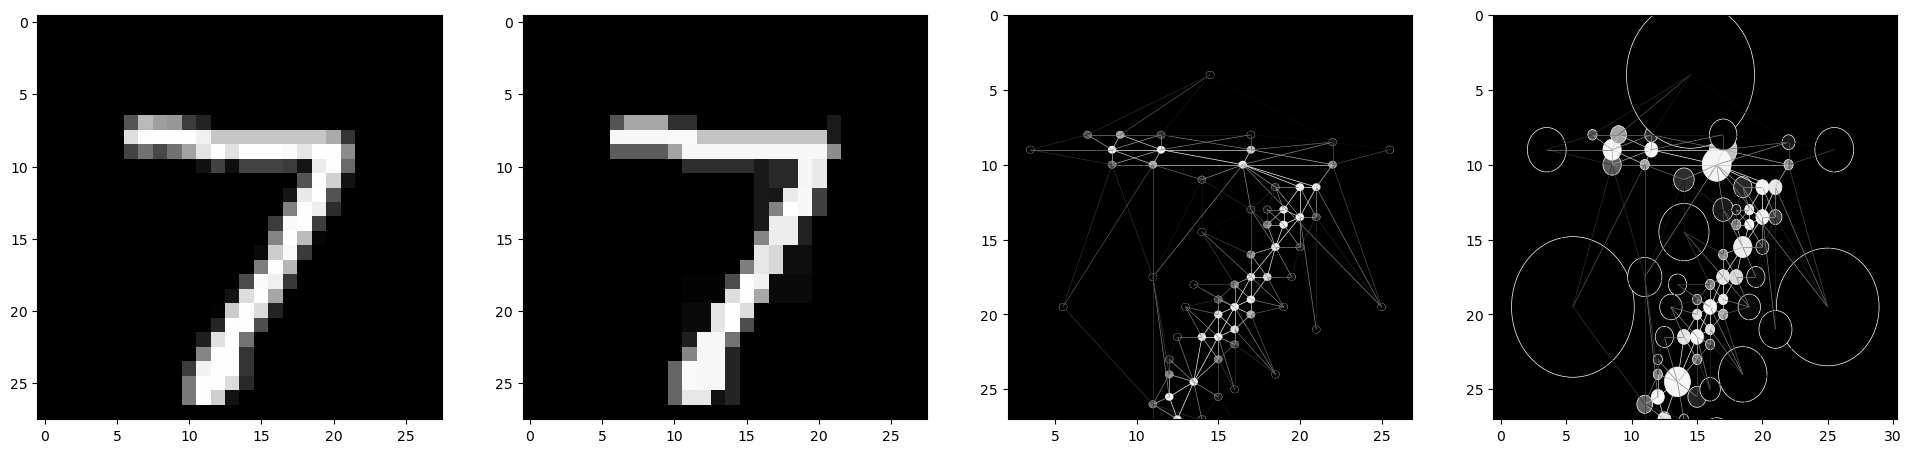

In [10]:
idx = 0
plot(idx, 64, is_rgb=False)